In [66]:
import warnings
warnings.filterwarnings("ignore")

In [67]:
import sys
print(sys.executable)


d:\Python_Program\ml_env\Scripts\python.exe


In [68]:
# Import Libraries
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense,
                                     Dropout, BatchNormalization)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

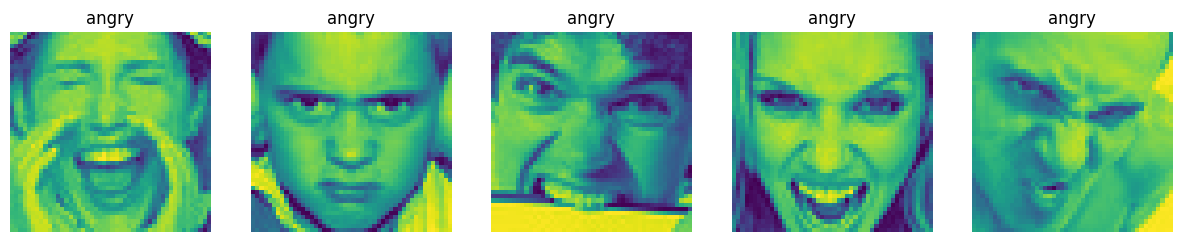

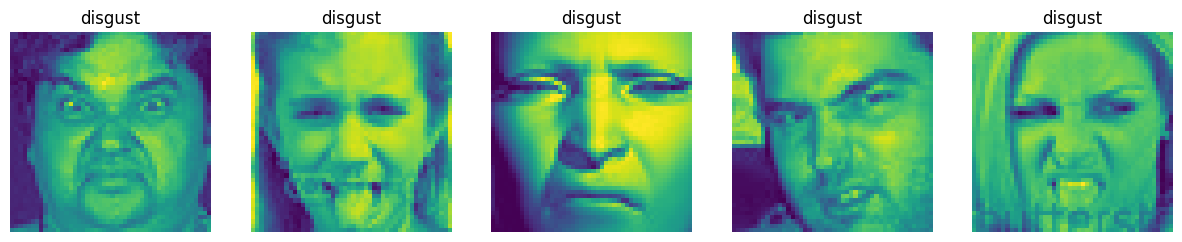

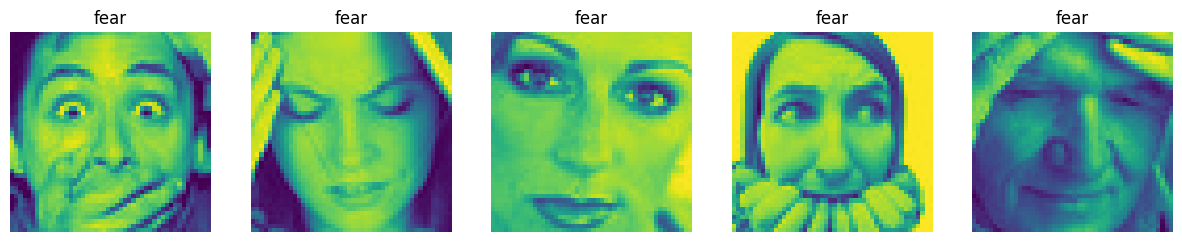

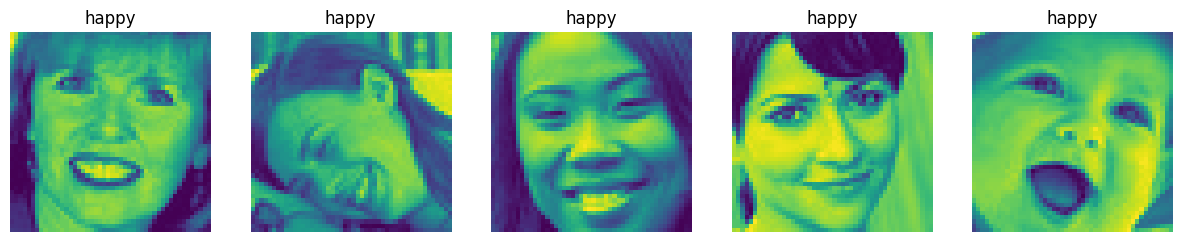

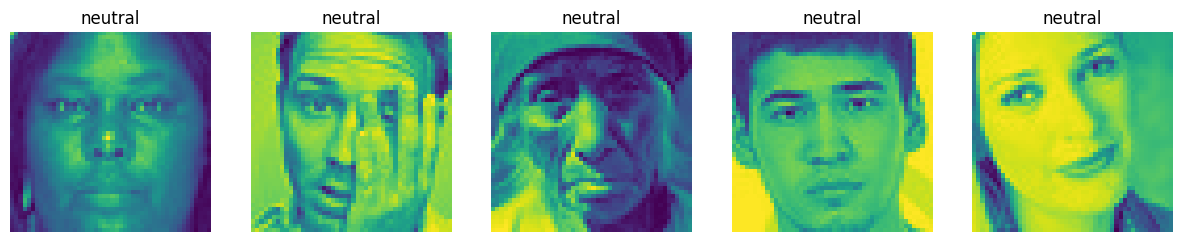

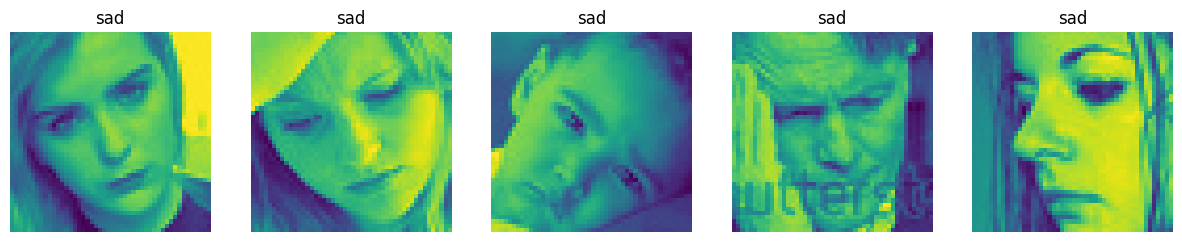

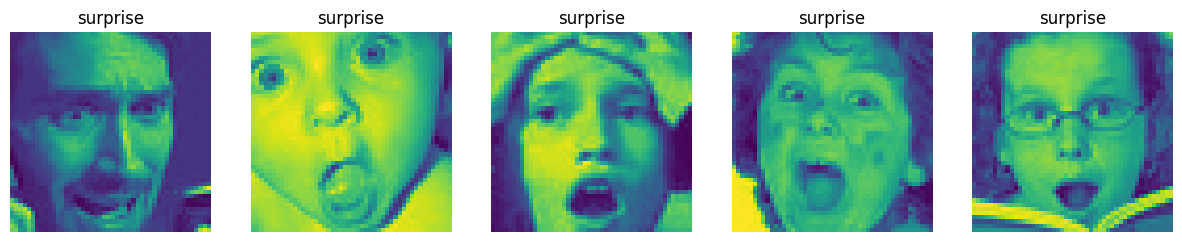

In [69]:
# random 5 iamge test 

test_dir = "archive/test"
test_dir_classes = os.listdir(test_dir)

for classes in test_dir_classes:
    class_path = os.path.join(test_dir, classes)
    
    img_name = os.listdir(class_path)
    
    random5 = random.sample(img_name, 5)
    
    plt.figure(figsize=(15, 3))
    for index ,  img in  enumerate(random5):
        img_complete_path = os.path.join(class_path, img)
        img = Image.open(img_complete_path)
        
        plt.subplot(1, 5, index+1 )
        plt.imshow(img)
        plt.title(classes)
        plt.axis('off')
    plt.show()
        
     
        
        

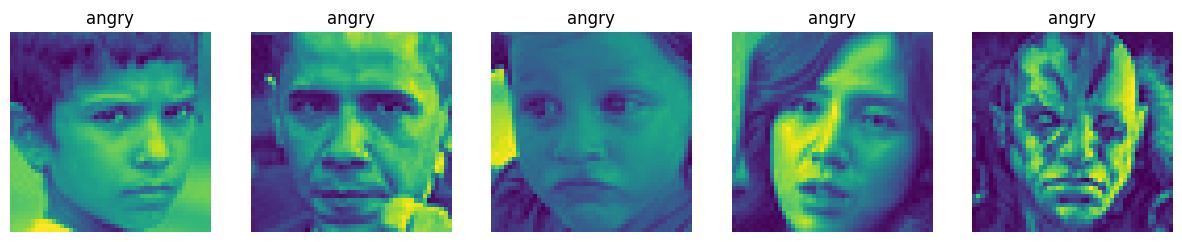

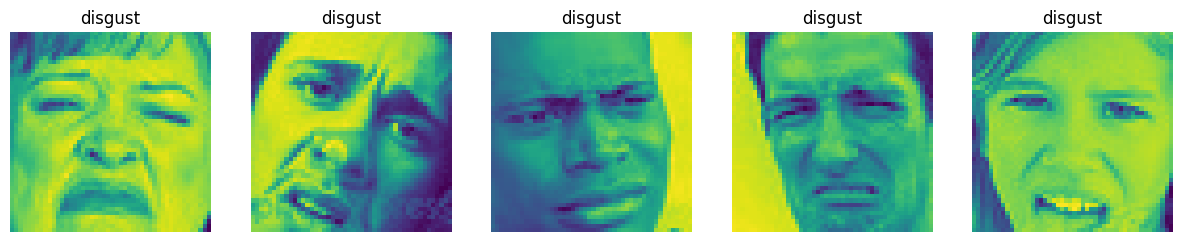

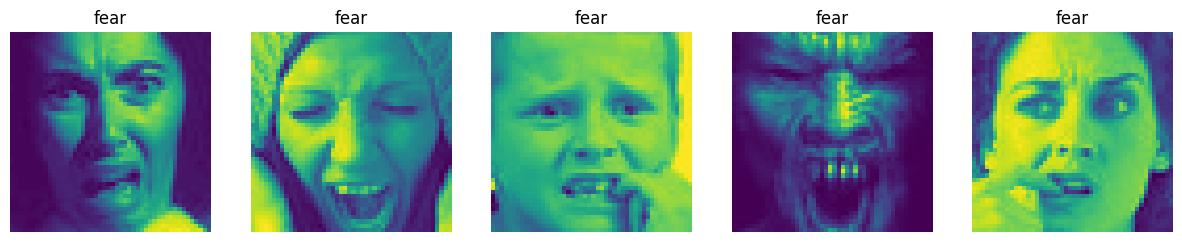

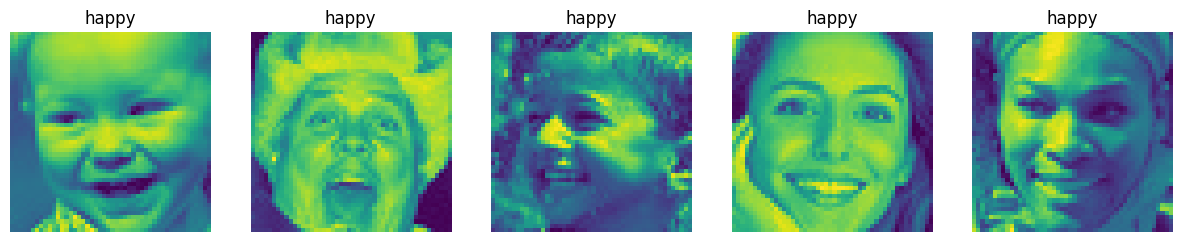

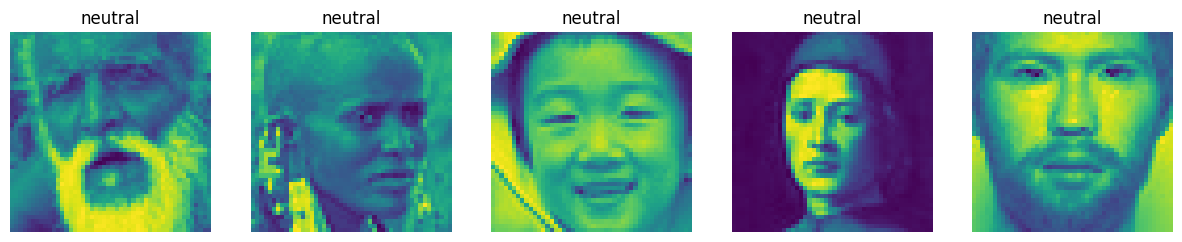

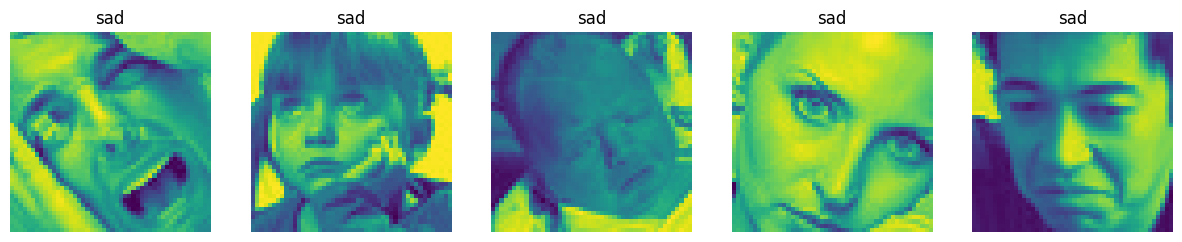

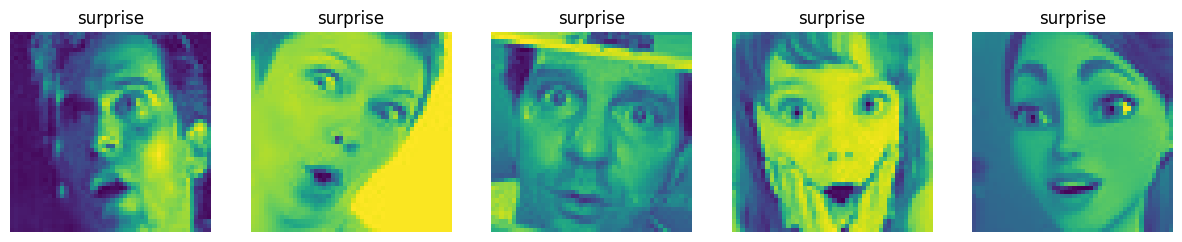

In [70]:
# random 5 image train

train_dir = "archive/train"
train_dir_classes = os.listdir(train_dir)

for classes in train_dir_classes:
    class_path = os.path.join(train_dir, classes)
    
    img_name = os.listdir(class_path)
    
    random5 = random.sample(img_name, 5)
    
    plt.figure(figsize=(15, 3))
    for index ,  img in  enumerate(random5):
        img_complete_path = os.path.join(class_path, img)
        img = Image.open(img_complete_path)
        
        plt.subplot(1, 5, index+1 )
        plt.imshow(img)
        plt.title(classes)
        plt.axis('off')
    plt.show()
        
     
        
        

In [71]:

#number of images in training folder 
train_dir = "archive/train"
train_dir_classes = os.listdir(train_dir)
print(train_dir_classes)

for classes in train_dir_classes:
    print(classes)
    class_path = os.path.join(train_dir, classes)
    
    img_name = os.listdir(class_path)
    print(f"Number of images in {classes}: {len(img_name)}")


['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
angry
Number of images in angry: 3995
disgust
Number of images in disgust: 436
fear
Number of images in fear: 4097
happy
Number of images in happy: 7215
neutral
Number of images in neutral: 4965
sad
Number of images in sad: 4830
surprise
Number of images in surprise: 3171


In [72]:

#number of images in training folder 

test_dir = "archive/test"
test_dir_classes = os.listdir(test_dir)
print(test_dir_classes)

for classes in test_dir_classes:
    print(classes)
    class_path = os.path.join(test_dir, classes)
    img_name = os.listdir(class_path)
    print(f"Number of images in {classes}: {len(img_name)}")


['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
angry
Number of images in angry: 958
disgust
Number of images in disgust: 111
fear
Number of images in fear: 1024
happy
Number of images in happy: 1774
neutral
Number of images in neutral: 1233
sad
Number of images in sad: 1247
surprise
Number of images in surprise: 831


In [77]:

import hashlib

def hasher_images(file_path, chunk_size=8192):
    hasher = hashlib.md5()
    with open(file_path, 'rb') as f:
        for chunk in iter(lambda: f.read(chunk_size), b''):
            hasher.update(chunk)
    return hasher.hexdigest()

duplicates = []
images = {}

image_ext = ('.jpg', '.jpeg', '.png')

for root, _, files in os.walk("archive/train"):
    for file in tqdm(files, desc=f"Scanning {os.path.basename(root)}"):
        if file.lower().endswith(image_ext):
            img_path = os.path.join(root, file)
            try:
                hash_value = hasher_images(img_path)

                if hash_value in images:
                    duplicates.append((hash_value, img_path))
                else:
                    images[hash_value] = img_path

            except Exception as e:
                print(f"⚠️ Skipped {img_path}: {e}")

print("Duplicate images found:", len(duplicates))
         

Scanning train: 0it [00:00, ?it/s]
Scanning surprise: 100%|██████████| 3171/3171 [00:00<00:00, 4380.03it/s]

Duplicate images found: 1236


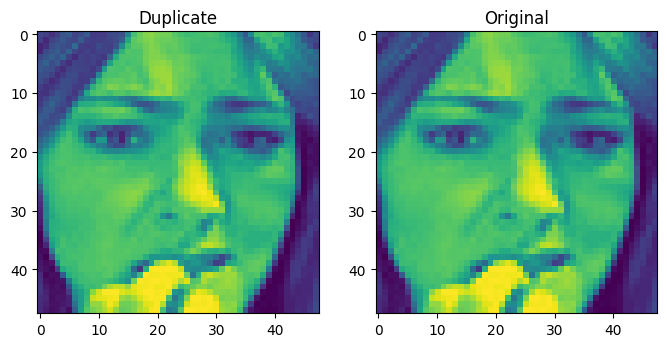

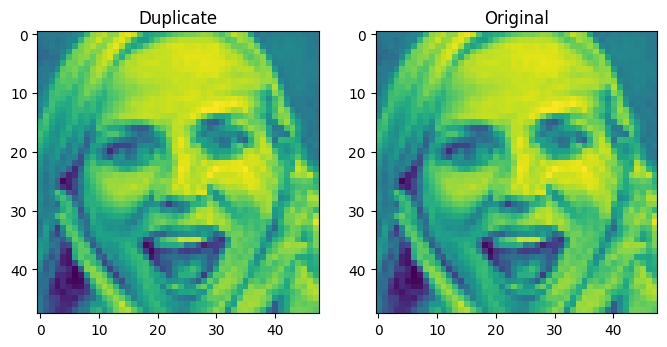

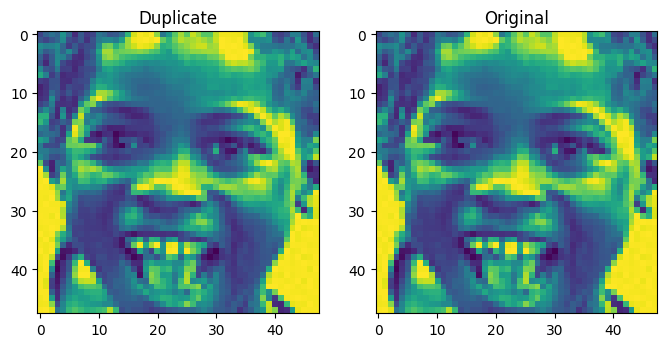

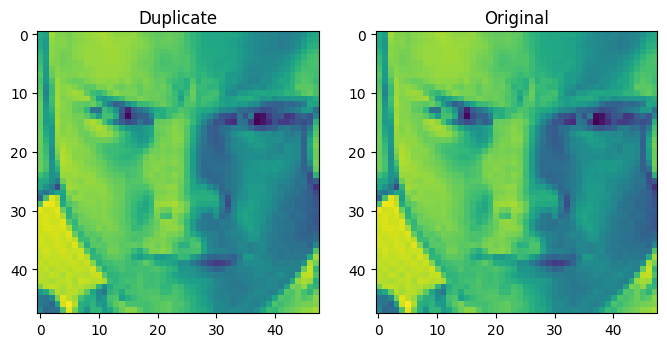

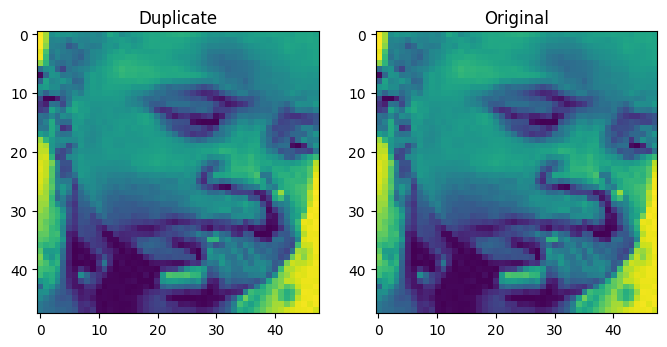

In [78]:
random5 = random.sample(duplicates, 5)


for hash_value, img_path in random5:
    duplicates_img_path= img_path
    original_img_path = images[hash_value]
    
    plt.figure(figsize=(8,4))
    plt.subplot(1, 2, 1)
    duplicate_img = Image.open(duplicates_img_path)
    plt.imshow(duplicate_img)
    plt.title("Duplicate")
    
    
    plt.subplot(1, 2, 2)
    original_img = Image.open(original_img_path)
    plt.imshow(original_img)
    plt.title("Original")
    plt.show()
    

In [75]:

import hashlib

def hasher_images(file_path, chunk_size=8192):
    hasher = hashlib.md5()
    with open(file_path, 'rb') as f:
        for chunk in iter(lambda: f.read(chunk_size), b''):
            hasher.update(chunk)
    return hasher.hexdigest()

duplicates = []
images = {}

image_ext = ('.jpg', '.jpeg', '.png')

for root, _, files in os.walk("archive/train"):
    for file in tqdm(files, desc=f"Scanning {os.path.basename(root)}"):
        if file.lower().endswith(image_ext):
            img_path = os.path.join(root, file)
            try:
                hash_value = hasher_images(img_path)

                if hash_value in images:
                    duplicates.append((hash_value, img_path))
                else:
                    images[hash_value] = img_path

            except Exception as e:
                print(f"⚠️ Skipped {img_path}: {e}")

print("Duplicate images found:", len(duplicates))


Scanning train: 0it [00:00, ?it/s]


Scanning surprise: 100%|██████████| 3171/3171 [00:07<00:00, 406.98it/s] 

Duplicate images found: 1236


In [76]:
duplicates_different_classes = 0

for hash_value, img_path in duplicates:
    duplicate_img_path = img_path
    original_img_path = images[hash_value]

    duplicate_img_class = os.path.basename(os.path.dirname(duplicate_img_path))
    original_img_class = os.path.basename(os.path.dirname(original_img_path))

    if duplicate_img_class != original_img_class:
        duplicates_different_classes += 1
        print("Original class :", original_img_class)
        print("Duplicate class:", duplicate_img_class)
        print("-" * 30)

print("Duplicates across different classes:", duplicates_different_classes)


Original class : angry
Duplicate class: fear
------------------------------
Original class : angry
Duplicate class: fear
------------------------------
Original class : disgust
Duplicate class: fear
------------------------------
Original class : angry
Duplicate class: fear
------------------------------
Original class : angry
Duplicate class: fear
------------------------------
Original class : angry
Duplicate class: happy
------------------------------
Original class : fear
Duplicate class: neutral
------------------------------
Original class : fear
Duplicate class: neutral
------------------------------
Original class : fear
Duplicate class: neutral
------------------------------
Original class : fear
Duplicate class: neutral
------------------------------
Original class : angry
Duplicate class: neutral
------------------------------
Original class : angry
Duplicate class: neutral
------------------------------
Original class : angry
Duplicate class: neutral
-----------------------